# Density-Based Classification: DBSCAN

DBSCAN stands for density-based spatial clustering of applications with noise. It is able to find arbitrary shaped clusters and clusters with noise (i.e. outliers). The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster. It involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

There are two key parameters of DBSCAN:

- eps: The distance that specifies the neighborhoods. Two points are considered to be neighbors if the distance between them are less than or equal to eps.
- minPts: Minimum number of data points to define a cluster.

Based on these two parameters, points are classified as core point, border point, or outlier:

- Core point: A point is a core point if there are at least minPts number of points (including the point itself) in its surrounding area with radius eps.
- Border point: A point is a border point if it is reachable from a core point and there are less than minPts number of points within its surrounding area.
- Outlier: A point is an outlier if it is not a core point and not reachable from any core points.


## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

## Load data

In [2]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
X[:10]

array([[ 1.22515974, -0.95173116],
       [ 1.01630365, -1.72517506],
       [ 0.33534004, -1.7248955 ],
       [ 1.78634822, -1.78265314],
       [ 1.01675094,  1.06256946],
       [-1.51405201, -1.8110384 ],
       [ 0.84364975, -1.57914694],
       [ 0.65799375,  0.07621282],
       [ 1.24395165,  0.17407616],
       [ 1.34096685,  0.13010495]])

## Explore data

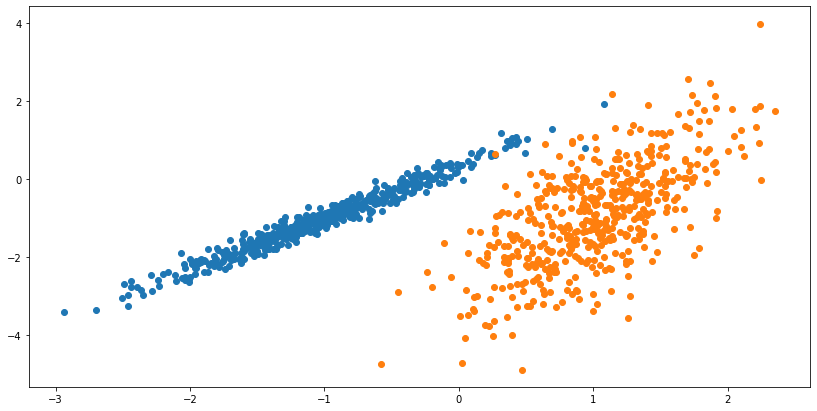

In [3]:
# create scatter plot for samples from each class
plt.figure(figsize=(14,7))

for class_value in range(2):
	# get row indexes for samples with this class
	row_idx = np.where(y == class_value)
	# create scatter of these samples
	plt.scatter(X[row_idx, 0], X[row_idx, 1])
# show the plot
plt.show()

## Create model

In [4]:
# define the model
model = DBSCAN(eps=0.30, min_samples=9)

## Create clusters

In [5]:
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)

In [6]:
clusters

array([-1,  0,  1])

## Plot clusters

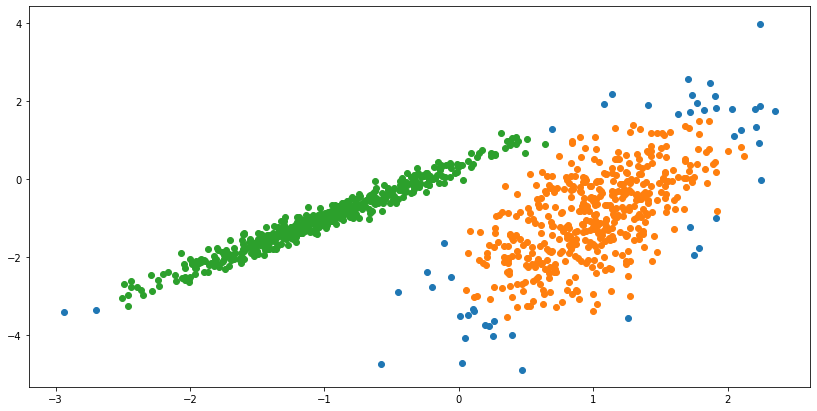

In [7]:
# create scatter plot for samples from each cluster
plt.figure(figsize=(14,7))

for cluster in clusters:
	# get row indexes for samples with this cluster
	row_idx = np.where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_idx, 0], X[row_idx, 1])
# show the plot
plt.show()